In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd

In [2]:
train_df = pd.read_csv('C://Users//Ayush//Downloads//archive//sign_mnist_train//sign_mnist_train.csv')
test_df = pd.read_csv('C://Users//Ayush//Downloads//archive//sign_mnist_test//sign_mnist_test.csv')


In [3]:
train_images = train_df.iloc[:, 1:].values.astype('float32')
train_labels = train_df.iloc[:, 0].values.astype('int32')
test_images = test_df.iloc[:, 1:].values.astype('float32')
test_labels = test_df.iloc[:, 0].values.astype('int32')

In [4]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [5]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(8, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(26, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2

In [8]:
#training the model
epochs=4
history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
epochs=epochs
)


Epoch 1/4
858/858 [==============================] - 11s 11ms/step - loss: 1.9138 - accuracy: 0.4142 - val_loss: 1.1290 - val_accuracy: 0.6255
Epoch 2/4
858/858 [==============================] - 8s 9ms/step - loss: 0.5577 - accuracy: 0.8204 - val_loss: 0.7338 - val_accuracy: 0.7711
Epoch 3/4
858/858 [==============================] - 7s 9ms/step - loss: 0.2167 - accuracy: 0.9318 - val_loss: 0.6439 - val_accuracy: 0.8225
Epoch 4/4
858/858 [==============================] - 7s 8ms/step - loss: 0.0950 - accuracy: 0.9730 - val_loss: 0.6489 - val_accuracy: 0.8253


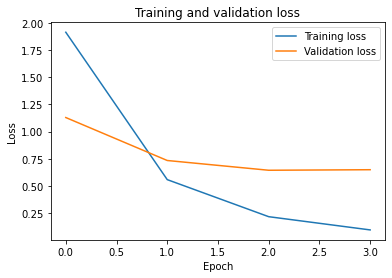

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()